# Google Colab Lab Assignment -YOLO 11 Model

**Course Name:** Deep Learning Lab

**Lab Title:** Yolo11 -Model-Application Name(Custom Dataset should be Different for each group)

**Student Name:**Pranav Khatavkar

**Student ID:**202201090028

**Date of Submission:** 9 April

**Group Members**: Aditya Sawleshwarkar, Omkar Karlekar


**Objective**
The purpose of this lab is to understand and implement YOLOv11 for real-time object detection. Students will perform dataset preparation, model implementation, inference, and performance evaluation.




**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [1]:
# Code Task 1
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – Use COCO, Pascal VOC, or a custom dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [3]:
#Code for Task. 2
from ultralytics import YOLO
from IPython.display import Image

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QSbgFovWZARPMsGjDnaf")
project = rf.workspace("microsoft").project("coco")
version = project.version(37)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to COCO-Dataset-37 in yolov11:: 100%|██████████| 430/430 [00:00<00:00, 6700.74it/s]


In [6]:
import os

print("Files in the dataset directory:")
print(os.listdir("/content/COCO-Dataset-37"))


Files in the dataset directory:
['README.roboflow.txt', 'data.yaml', 'valid', 'test', 'README.dataset.txt', 'train']


In [7]:
with open("/content/COCO-Dataset-37/test/labels/000000005345_jpg.rf.56214d8f360cebc9501c4afb04678af6.txt", "r") as f:
    print(f.read())


51 0.8457187500000001 0.14427745714285714 0.8065 0.13578034642857145 0.73603125 0.19309248571428572 0.736765625 0.22040462500000002 0.735796875 0.22309248571428572 0.7311875 0.23072254285714286 0.7285312500000001 0.25312138749999996 0.729984375 0.3659826589285714 0.733375 0.4913872839285714 0.734578125 0.5003468214285713 0.743296875 0.5240751446428571 0.742390625 0.5502312142857143 0.744265625 0.7387861267857143 0.755453125 0.7577456642857143 0.753265625 0.7640751446428572 0.812 0.8836416178571429 0.831578125 0.8790462428571428 0.831265625 0.8732947982142858 0.834375 0.8577745660714285 0.835625 0.8464450875 0.8369531250000001 0.8296242767857143 0.84053125 0.5537283232142857 0.8457187500000001 0.14427745714285714
13 0.5379843750000001 0.42040462500000003 0.53728125 0.38887283214285717 0.536296875 0.38421965357142857 0.53378125 0.38034682142857146 0.5335 0.3725722535714286 0.5335 0.36430635892857144 0.53015625 0.36430635892857144 0.52959375 0.37 0.529734375 0.37904624285714283 0.52846875


**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [9]:
import os
import zipfile
from roboflow import Roboflow

#  Initialize Roboflow and download dataset in YOLOv8 format
from roboflow import Roboflow
rf = Roboflow(api_key="QSbgFovWZARPMsGjDnaf")
project = rf.workspace("microsoft").project("coco")
version = project.version(37)
dataset = version.download("yolov11")

#  Get dataset folder path
dataset_folder = dataset.location  # e.g., '/content/people-detection-9'
zip_path = os.path.join(dataset_folder, "roboflow.zip")
extract_path = dataset_folder  # Extract in the same folder

# 1. Unzip the dataset
if os.path.exists(zip_path):
    print("📦 Extracting dataset...")
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print(" Dataset extracted successfully!")
else:
    print(" roboflow.zip not found at:", zip_path)

#  2. Verify dataset structure
yaml_path = os.path.join(extract_path, "data.yaml")

if os.path.exists(yaml_path):
    print(" data.yaml found at:", yaml_path)
else:
    print(" data.yaml is missing! Check extracted folder contents:")
    print(os.listdir(extract_path))


loading Roboflow workspace...
loading Roboflow project...
 roboflow.zip not found at: /content/COCO-Dataset-37/roboflow.zip
 data.yaml found at: /content/COCO-Dataset-37/data.yaml


In [11]:
#code for task 3
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=200 imgsz=640

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/COCO-Dataset-37/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

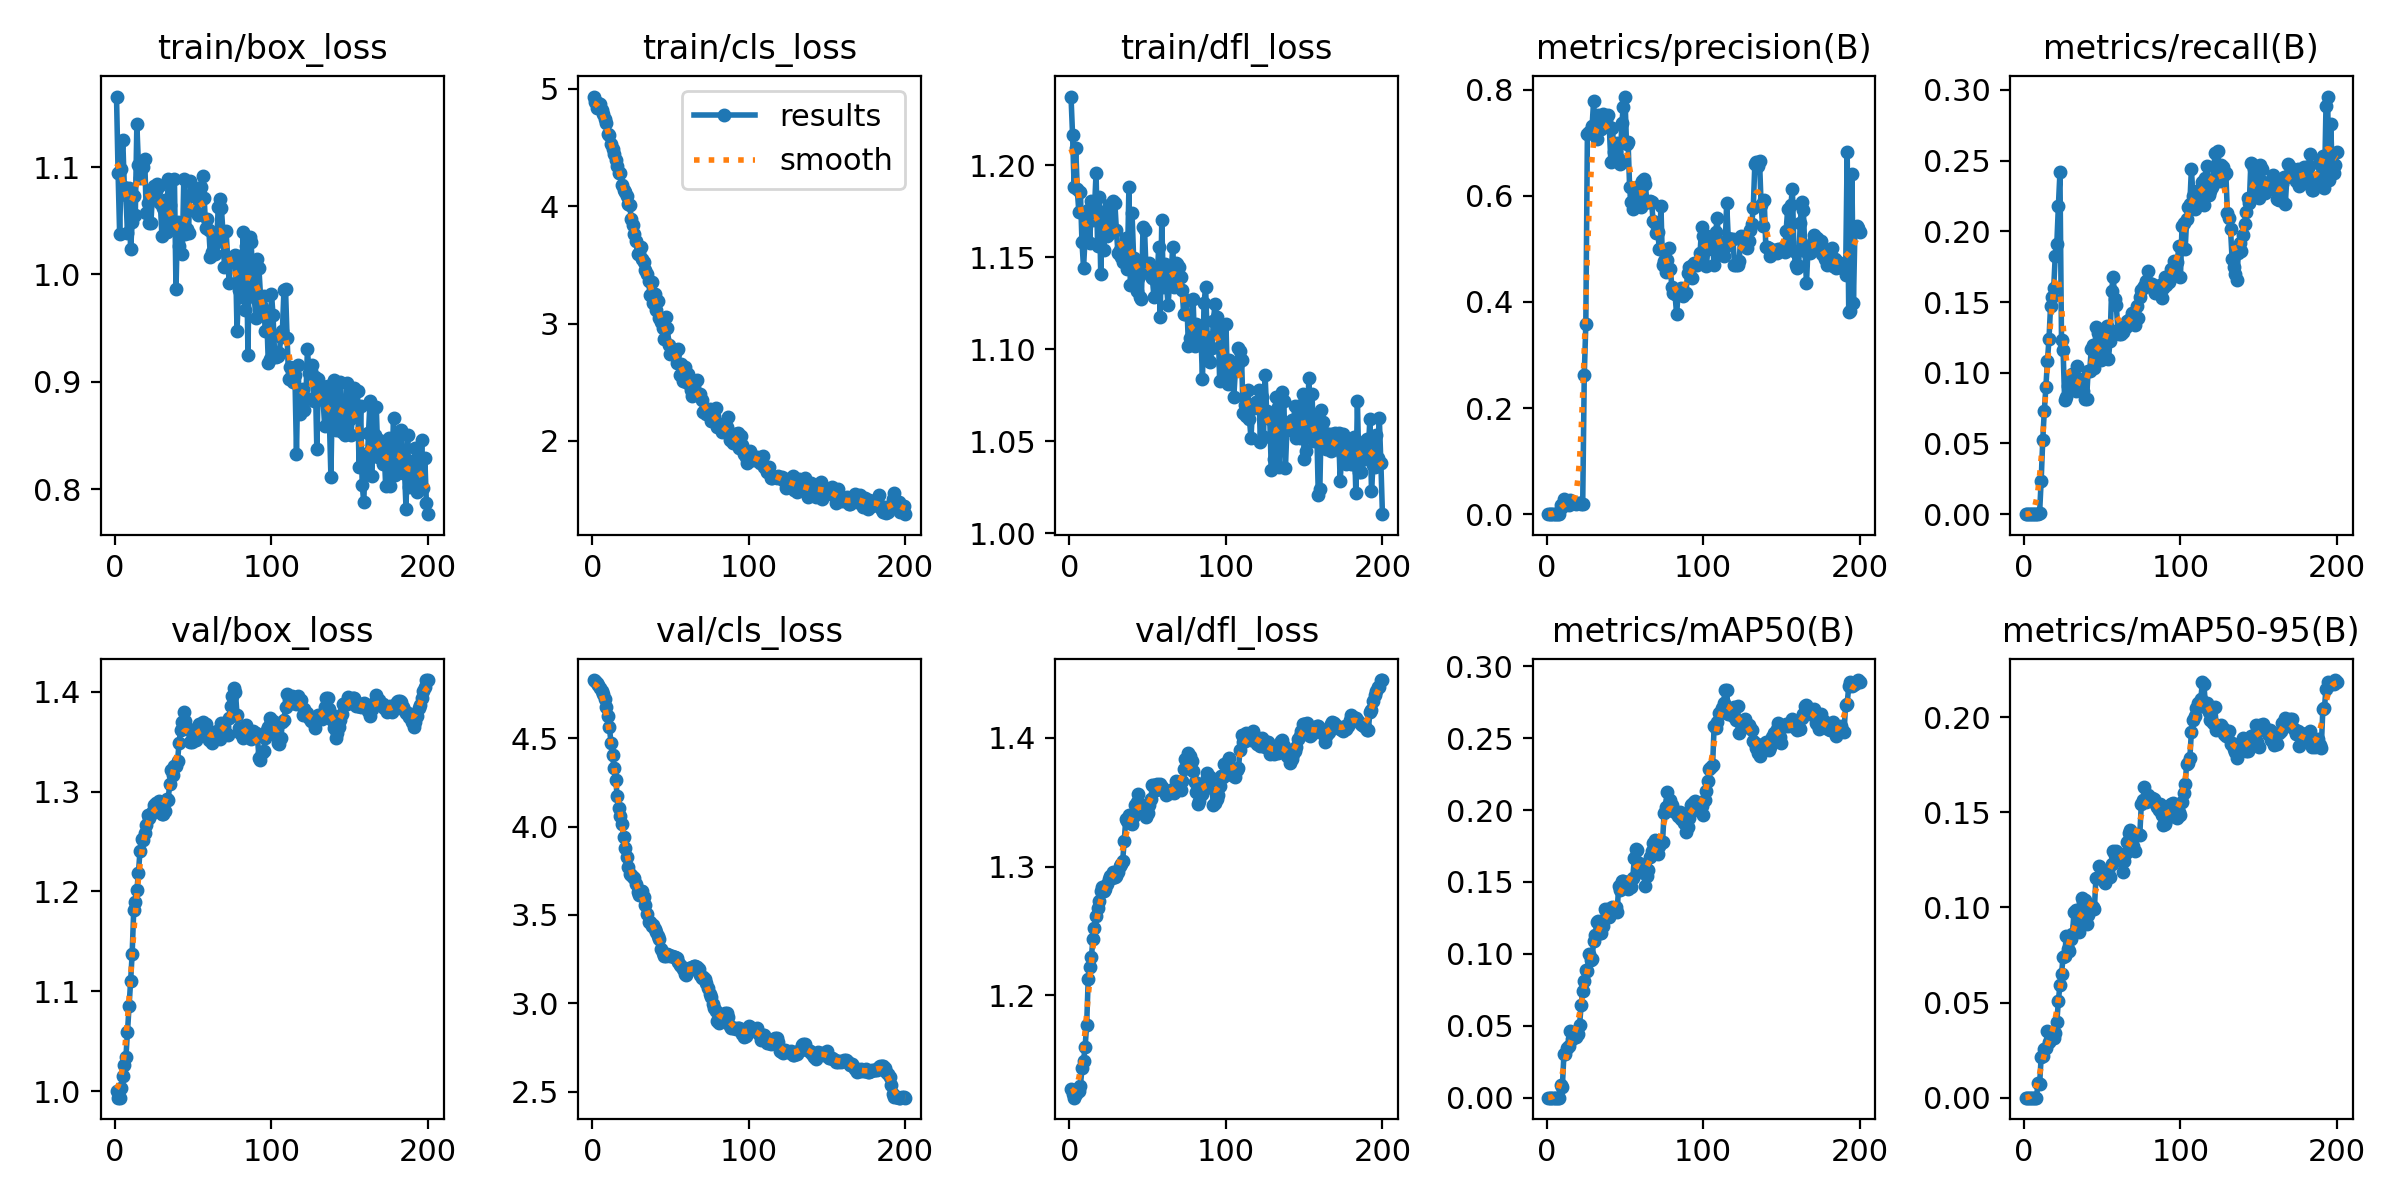

In [12]:
Image("/content/runs/detect/train3/results.png", width=600)

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis** *##Add Text##*


In [14]:
# Code for Task 4
from ultralytics import YOLO

# Load model
model = YOLO("runs/detect/train3/weights/best.pt")


In [15]:
# Run prediction
results = model.predict(source='/content/COCO-Dataset-37/test/images', save=True, conf=0.25)


image 1/19 /content/COCO-Dataset-37/test/images/000000005345_jpg.rf.56214d8f360cebc9501c4afb04678af6.jpg: 640x640 1 chair, 10.8ms
image 2/19 /content/COCO-Dataset-37/test/images/000000005425_jpg.rf.0a298cc4c74836d2568e8905ffe4968f.jpg: 640x640 1 person, 1 surfboard, 11.6ms
image 3/19 /content/COCO-Dataset-37/test/images/000000005443_jpg.rf.9c15fef57c5947aae7414e68c0e85bbb.jpg: 640x640 1 book, 1 person, 1 snowboard, 8.7ms
image 4/19 /content/COCO-Dataset-37/test/images/000000007673_jpg.rf.c5440217258b497079911cfb60bd1869.jpg: 640x640 1 person, 1 snowboard, 1 surfboard, 8.6ms
image 5/19 /content/COCO-Dataset-37/test/images/000000010388_jpg.rf.05d8d57a933bcfe89a5ccdca1c6e34f5.jpg: 640x640 1 car, 1 person, 8.6ms
image 6/19 /content/COCO-Dataset-37/test/images/000000011702_jpg.rf.e7fd0e82ff43ac83c302fd17a70640de.jpg: 640x640 1 person, 8.7ms
image 7/19 /content/COCO-Dataset-37/test/images/000000016009_jpg.rf.bb1d4efb14a619fd397b9c2890822cbc.jpg: 640x640 6 persons, 1 tie, 8.4ms
image 8/19 /c

In [16]:
# Evaluate on validation or test set
metrics = model.val()
print(metrics)


Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/COCO-Dataset-37/valid/labels.cache... 55 images, 0 backgrounds, 0 corrupt: 100%|██████████| 55/55 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


                   all         55        397      0.538      0.247      0.291      0.221
              backpack          1          1          0          0          0          0
                banana          1          2          1          0          0          0
          baseball bat          1          1          1          0          0          0
        baseball glove          1          4          1          0          0          0
                 bench          3          4          0          0          0          0
               bicycle          3          3      0.493      0.667      0.668      0.468
                  bird          2          4          1          0          0          0
                  boat          1          1      0.613          1      0.995      0.895
                bottle          4          7      0.182      0.286       0.27      0.222
                   bus          3          3      0.238      0.667      0.621      0.593
                  cak

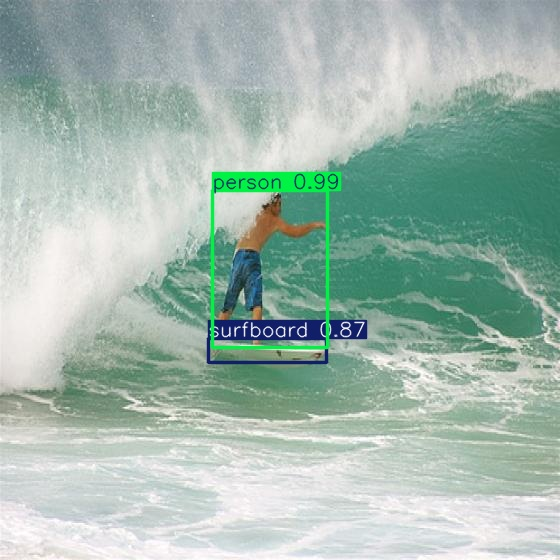

In [18]:
# Images with bounding boxes are saved in runs/detect/predict/
from IPython.display import Image
display(Image('/content/runs/detect/predict/000000005425_jpg.rf.0a298cc4c74836d2568e8905ffe4968f.jpg'))


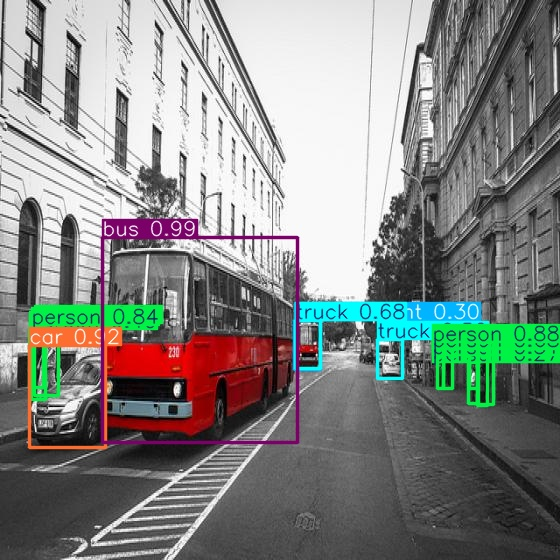

In [19]:
from IPython.display import Image
display(Image('/content/runs/detect/predict/000000031748_jpg.rf.2672fb8b9f6c64e120287531899eaa87.jpg'))

Discussion

The dataset has 78 classes. We have trained the model over 200 epochs which isnot enough for optimum convergence. Therefore the performance metrics range between 0.2 to 0.8


Classes: 78

Training Images: 135

Validation Images: 55

Batch Size: 16

Input Size: 640×640

Optimizer: AdamW with auto-configured learning rate and momentum

Higher number of epochs will result in better learning of all classes and hence the metrics will also improve.

**Declaration**

I, Pranav Khatavkar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Pranav Khatavkar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion